In [1]:
Sys.setenv(LANG="en")
library(Seurat)
library(future)
plan("multisession", workers = 10)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
#follow the tutorial https://satijalab.org/seurat/articles/seurat5_spatial_vignette_2
#and 
# how to construct a spatial object in seurat 

In [3]:
#path <- "./Xenium_V1_FF_Mouse_Brain_Coronal_Subset_CTX_HP_outs/cell_feature_matrix/"
#path <- "./Xenium_V1_FF_Mouse_Brain_Coronal_Subset_CTX_HP_outs/"
# Load the Xenium data
#xenium.obj <- LoadXenium(path, fov = "fov")
# remove cells with 0 counts
#xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 0)

In [4]:
cd <- read.csv('countsCbyG.csv', row.names = 1)
annot <- read.csv('meta.csv', row.names = 1)
pos <- annot[, c('x', 'y')]
#pos[,2] <- -pos[,2] ## flip Y coordinates for better visualization
location = as.matrix(pos)
#raw_matrix = t(cd[,1:483])
raw_matrix = t(cd)

In [5]:
vizgen.obj <- CreateSeuratObject(counts=raw_matrix,assay="Vizgen")
cents <- CreateCentroids(pos)
segmentations.data <- list(
    "centroids"=cents,
    "segmentation"=NULL
    )

coords <- CreateFOV(
    coords = CreateCentroids(pos),
    type=c("segmentation", "centroids"), 
    molecules=NULL,
    assay="Vizgen")

vizgen.obj[["fov"]] <-coords 

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [6]:
vizgen.obj

An object of class Seurat 
550 features across 44699 samples within 1 assay 
Active assay: Vizgen (550 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: fov

In [7]:
dim(vizgen.obj)

[1]   550 44699

In [8]:
#VlnPlot(xenium.obj, features = c("nFeature_Xenium", "nCount_Xenium"), ncol = 2, pt.size = 0)

In [9]:
#ImageDimPlot(xenium.obj, fov = "fov", molecules = c("Gad1", "Sst", "Pvalb", "Gfap"), nmols = 20000)

In [11]:
#ImageFeaturePlot(xenium.obj, features = c("Cux2", "Rorb", "Bcl11b", "Foxp2"), max.cutoff = c(25,
#    35, 12, 10), size = 0.75, cols = c("white", "red"))

In [12]:
vizgen.obj <- SCTransform(vizgen.obj, assay = "Vizgen")
vizgen.obj <- RunPCA(vizgen.obj, npcs = 30, features = rownames(vizgen.obj))
vizgen.obj <- RunUMAP(vizgen.obj, dims = 1:30)
vizgen.obj <- FindNeighbors(vizgen.obj, reduction = "pca", dims = 1:30)
vizgen.obj <- FindClusters(vizgen.obj, resolution = 0.3)

Running SCTransform on assay: Vizgen

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 550 by 44699

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 550 genes, 5000 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 44699
Number of edges: 1690711

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9638
Number of communities: 20
Elapsed time: 5 seconds


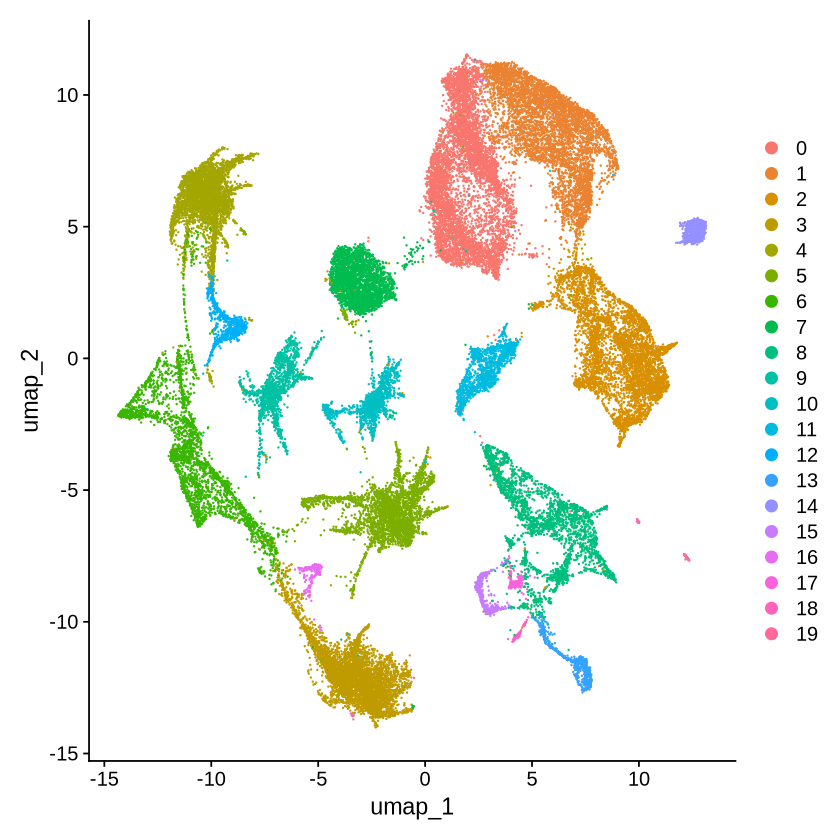

In [13]:
DimPlot(vizgen.obj)


In [15]:
#annotations.df <- RCTD@results$results_df
#annotations <- annotations.df$first_type
annotations <- annot[,c("annot")]

#names(annotations) <- rownames(annotations.df)
vizgen.obj$predicted.celltype <- annotations
keep.cells <- Cells(vizgen.obj)[!is.na(vizgen.obj$predicted.celltype)]
vizgen.obj <- subset(vizgen.obj, cells = keep.cells)

In [16]:
Cells(vizgen.obj)

[1] "cell0"     "cell1"     "cell2"     "cell3"     "cell4"     "cell5"    
    [7] "cell6"     "cell7"     "cell8"     "cell9"     "cell10"    "cell11"   
   [13] "cell12"    "cell13"    "cell14"    "cell15"    "cell16"    "cell17"   
   [19] "cell18"    "cell19"    "cell20"    "cell21"    "cell22"    "cell23"   
   [25] "cell24"    "cell25"    "cell26"    "cell27"    "cell28"    "cell29"   
   [31] "cell30"    "cell31"    "cell32"    "cell33"    "cell34"    "cell35"   
   [37] "cell36"    "cell37"    "cell38"    "cell39"    "cell40"    "cell41"   
   [43] "cell42"    "cell43"    "cell44"    "cell45"    "cell46"    "cell47"   
   [49] "cell48"    "cell49"    "cell50"    "cell51"    "cell52"    "cell53"   
   [55] "cell54"    "cell55"    "cell56"    "cell57"    "cell58"    "cell59"   
   [61] "cell60"    "cell61"    "cell62"    "cell63"    "cell64"    "cell65"   
   [67] "cell66"    "cell67"    "cell68"    "cell69"    "cell70"    "cell71"   
   [73] "cell72"    "cell73"    "cell74"    "cell75"    "cell76"    "cell77"   
   [79] "cell78"    "cell79"    "cell80"    "cell81"    "cell82"    "cell83"   
   [85] "cell84"    "cell85"    "cell86"    "cell87"    "cell88"    "cell89"   
   [91] "cell90"    "cell91"    "cell92"    "cell93"    "cell94"    "cell95"   
   [97] "cell96"    "cell97"    "cell98"    "cell99"    "cell100"   "cell101"  
  [103] "cell102"   "cell103"   "cell104"   "cell105"   "cell106"   "cell107"  
  [109] "cell108"   "cell109"   "cell110"   "cell111"   "cell112"   "cell113"  
  [115] "cell114"   "cell115"   "cell116"   "cell117"   "cell118"   "cell119"  
  [121] "cell120"   "cell121"   "cell122"   "cell123"   "cell124"   "cell125"  
  [127] "cell126"   "cell127"   "cell128"   "cell129"   "cell130"   "cell131"  
  [133] "cell132"   "cell133"   "cell134"   "cell135"   "cell136"   "cell137"  
  [139] "cell138"   "cell139"   "cell140"   "cell141"   "cell142"   "cell143"  
  [145] "cell144"   "cell145"   "cell146"   "cell147"   "cell148"   "cell149"  
  [151] "cell150"   "cell151"   "cell152"   "cell153"   "cell154"   "cell155"  
  [157] "cell156"   "cell157"   "cell158"   "cell159"   "cell160"   "cell161"  
  [163] "cell162"   "cell163"   "cell164"   "cell165"   "cell166"   "cell167"  
  [169] "cell168"   "cell169"   "cell170"   "cell171"   "cell172"   "cell173"  
  [175] "cell174"   "cell175"   "cell176"   "cell177"   "cell178"   "cell179"  
  [181] "cell180"   "cell181"   "cell182"   "cell183"   "cell184"   "cell185"  
  [187] "cell186"   "cell187"   "cell188"   "cell189"   "cell190"   "cell191"  
  [193] "cell192"   "cell193"   "cell194"   "cell195"   "cell196"   "cell197"  
  [199] "cell198"   "cell199"   "cell200"   "cell201"   "cell202"   "cell203"  
  [205] "cell204"   "cell205"   "cell206"   "cell207"   "cell208"   "cell209"  
  [211] "cell210"   "cell211"   "cell212"   "cell213"   "cell214"   "cell215"  
  [217] "cell216"   "cell217"   "cell218"   "cell219"   "cell220"   "cell221"  
  [223] "cell222"   "cell223"   "cell224"   "cell225"   "cell226"   "cell227"  
  [229] "cell228"   "cell229"   "cell230"   "cell231"   "cell232"   "cell233"  
  [235] "cell234"   "cell235"   "cell236"   "cell237"   "cell238"   "cell239"  
  [241] "cell240"   "cell241"   "cell242"   "cell243"   "cell244"   "cell245"  
  [247] "cell246"   "cell247"   "cell248"   "cell249"   "cell250"   "cell251"  
  [253] "cell252"   "cell253"   "cell254"   "cell255"   "cell256"   "cell257"  
  [259] "cell258"   "cell259"   "cell260"   "cell261"   "cell262"   "cell263"  
  [265] "cell264"   "cell265"   "cell266"   "cell267"   "cell268"   "cell269"  
  [271] "cell270"   "cell271"   "cell272"   "cell273"   "cell274"   "cell275"  
  [277] "cell276"   "cell277"   "cell278"   "cell279"   "cell280"   "cell281"  
  [283] "cell282"   "cell283"   "cell284"   "cell285"   "cell286"   "cell287"  
  [289] "cell288"   "cell289"   "cell290"   "cell291"   "cell292"   "cell293"  
  [295] "cell294"   "cell295"   "cell296"   "cell297"   "cell298"   "cell299"  
  [3

In [17]:
vizgen.obj <- BuildNicheAssay(object = vizgen.obj, fov='fov', group.by = "predicted.celltype",
    niches.k = 6, neighbors.k = 30)

Computing nearest neighbor graph

Computing SNN

Centering and scaling data matrix



Warning message:
“No FOV associated with assay 'niche', using global default FOV”
Warning message:
“No FOV associated with assay 'niche', using global default FOV”


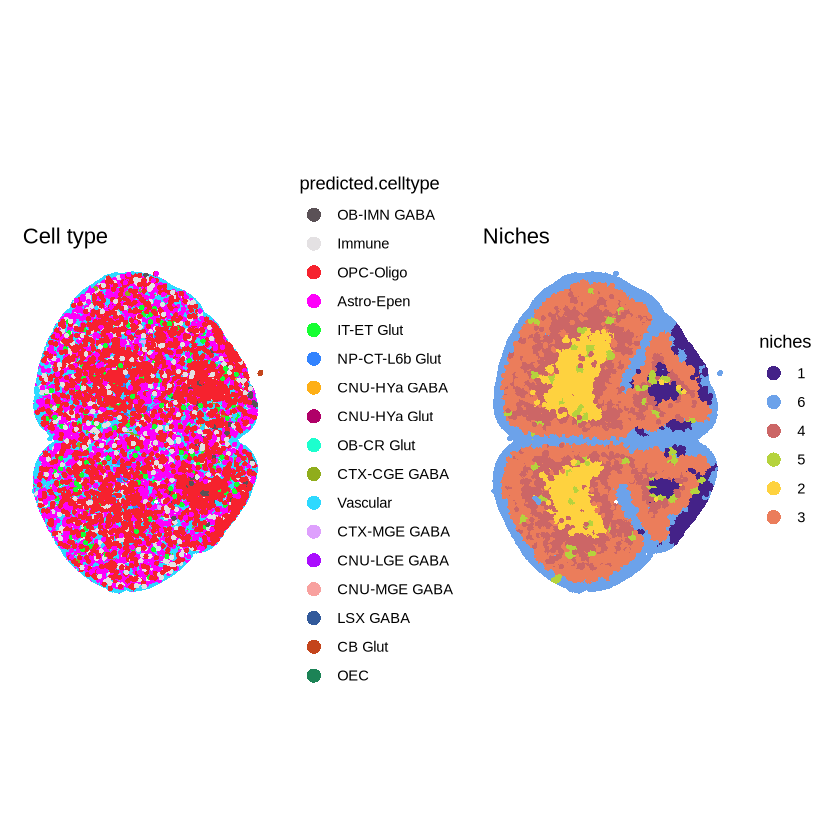

In [19]:
celltype.plot <- ImageDimPlot(vizgen.obj, group.by = "predicted.celltype", size = 1.5, cols = "polychrome",
    dark.background = F) + ggtitle("Cell type")
niche.plot <- ImageDimPlot(vizgen.obj, group.by = "niches", size = 1.5, dark.background = F) + ggtitle("Niches") +
    scale_fill_manual(values = c("#442288", "#6CA2EA","#CC6666", "#B5D33D", "#FED23F", "#EB7D5B"))
celltype.plot | niche.plot

In [ ]:
#table(xenium.obj$predicted.celltype, xenium.obj$niches)

In [ ]:
#xenium.obj$predicted.celltype

In [20]:
write.csv(paste(Cells(vizgen.obj),",",
    vizgen.obj$predicted.celltype,",", vizgen.obj$niches ),'out_seurat.csv',
          col.names=c("barcode","ct","domain"),
          quote=FALSE,row.names=FALSE)

Warning message in write.csv(paste(Cells(vizgen.obj), ",", vizgen.obj$predicted.celltype, :
“attempt to set 'col.names' ignored”
